# Lab 10: Regression

In [1]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
from datascience import *

# These lines set up the plotting functionality and formatting.
import matplotlib.pyplot as plots
%matplotlib inline
plots.style.use('fivethirtyeight')

# 1. The Dataset

In this lab, we are again exploring movie screenplays. We will again use a list of 5,000 words (including stemmed words) that occur in conversations between movie characters. For each movie, our dataset tells us the frequency with which each of these words occurs in certain conversations in its screenplay. All words have been converted to lowercase.

Run the cell below to read the `movies` table.

In [2]:
movies = Table.read_table('movies.csv')
movies.where("Title", "wild wild west").select(0, 1, 2, 3, 4, 14, 49, 1042, 4004)

Title,Year,Rating,Genre,# Words,breez,england,it,bravo
wild wild west,1999,4.3,comedy,3446,0,0,0.0212635,0


The above cell prints a few columns of the row for the comedy movie *Wild Wild West*.  The movie contains 3446 words. The word "it" appears 74 times, as it makes up  $\frac{74}{3446} \approx 0.021364$ of the words in the movie. The word "england" doesn't appear at all.
This numerical representation of a body of text, one that describes only the frequencies of individual words, is called a bag-of-words representation. A lot of information is discarded in this representation: the order of the words, the context of each word, who said what, the cast of characters and actors, etc. However, a bag-of-words representation is often used for machine learning applications as a reasonable starting point, because a great deal of information is also retained and expressed in a convenient and compact format.

All movie titles are unique. The `row_for_title` function provides fast access to the one row for each title. 

*Note: All movies in our dataset have their titles lower-cased.* 

In [3]:
title_index = movies.index_by('Title')
def row_for_title(title):
    """Return the row for a title, similar to the following expression (but faster)
    
    movies.where('Title', title).row(0)
    """
    return title_index.get(title)[0]

For example, the fastest way to find the frequency of "she" in the movie *Heathers* is to access the `'she'` item from its row. Check the original table to see if this worked for you!

In [4]:
row_for_title('heathers').item('she') 

0.0041295370571613997

This dataset was extracted from [a dataset from Cornell University](http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html). After transforming the dataset (e.g., converting the words to lowercase, removing the naughty words, and converting the counts to frequencies), we created this new dataset containing the frequency of 5000 common words in each movie.

## 2. More Words for Multiple Regression

In lab 9 you looked at the relationship between the proportion of the word `her` in screenplays versus the word `she` and used linear regression to investigate this relationship. Run the cell below to plot the relationship between these proportions.

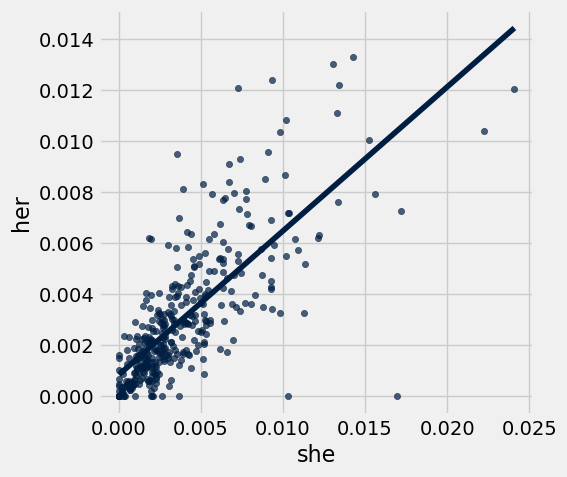

In [5]:
movies.scatter('she', 'her', fit_line = True)

**Question 2.1.** Choose a new word in the dataset that you think could be used to predict the proportion of the word `her` in a screenplay. The new word should have a correlation of greater than 0.05 or less than -0.05 with `her` (ideally with a much larger magnitude). The code to plot the scatter plot and line of best fit is given for you, you just need to calculate the correct values for `r_her_new_word`, `slope_her_new_word` and `intercept_her_new_word`. You can add functions from class and lines of code as needed.

*Hint: It's easier to think of words with a positive correlation, i.e. words that are often mentioned together*.

<!--
BEGIN QUESTION
name: q2_1
manual: true
image: true
-->
<!-- EXPORT TO PDF -->

Correlation: 0.390390754845


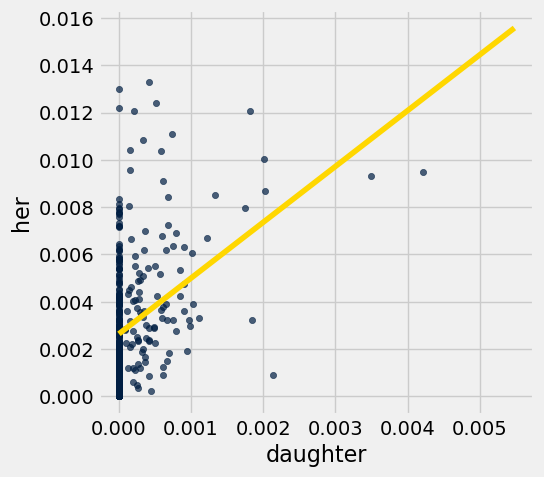

In [43]:
new_word = 'daughter'

# This array should make your code cleaner!
arr_new_word = movies.column(new_word)

new_word_su = (arr_new_word - np.mean(arr_new_word)) / np.std(arr_new_word)

r_her_new_word = np.mean((movies.column('her') - np.mean(movies.column('her'))) / np.std(movies.column('her'))
                                                                                        * new_word_su)

slope_her_new_word = r_her_new_word * np.std(movies.column('her')) / np.std(arr_new_word)
intercept_her_new_word = np.average(movies.column('her') - slope_her_new_word * np.average(arr_new_word))

# DON'T CHANGE THESE LINES OF CODE
movies.scatter(new_word, 'her')
max_x = max(movies.column(new_word))
print('Correlation:', r_her_new_word)
plots.plot([0, max_x * 1.3], [intercept_her_new_word, intercept_her_new_word + slope_her_new_word * (max_x*1.3)], color='gold');

In class we saw that the best fit regression line used to predict y with x minimized the root mean square error (rmse). 

$$
rmse ~=~ \sqrt{mean{(y - y_{estimate})}^2}
$$



**Question 2.2.** Define the function below to calculate the root mean square error for a regression line that uses the proportion of `new_word` as predictor for the proportion of `her`.

In [45]:
def her_new_word_rmse(any_slope, any_intercept):
    x = arr_new_word
    y = movies.column('her')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

Run the cell below to minimize the function.

In [46]:
minimize(her_new_word_rmse)

array([ 2.3616991 ,  0.00263609])

**Question 2.3.** Assign the slope and intercept that minimize the root mean square errors of the regression line to `coef_new_word_q2_2` and `int_q2_2`

In [ ]:
coef_new_word_q2_2 = ...
int_q2_2 = ...

coef_new_word_q2_2, int_q2_2

**Question 2.4.** Using the function defined in question 2.2 and the slope and intercept from question 2.3, Calculate the value of the rmse for your regression line. Assign this value to `min_rmse_new_word`.

In [ ]:
min_rmse_new_word = ...
min_rmse_new_word 

**Question 2.5.** For the movie `heathers`, what proportion of the words in the script does your model predict will be `her` using the proportion of your `new_word` in a screenplay? Assign this value to `her_prop_heathers_q2_2`.

In [ ]:
her_prop_heathers_q2_2 = ...
her_prop_heathers_q2_2

This method of using the minimize function to find the minimum root mean square value for a function can be extended to nonlinear models as well as to models with multiple predictors.

**Question 2.6.** Use the proportions of your `new_word` and `she` to construct a multiple regression model to predict the proportion of the words in the script that are `her`.


$$
her_{estimate} ~=~ a*newword + b*she + c
$$

for constants $a$, $b$, and $c$

Define the function below to calculate the root mean square error for a regression line that has the proportions of these words as predictors for the proportion of `her` in a screenplay.

In [ ]:
def she_new_her_rmse(a, b, c):

    ...

    return ...

**Question 2.7.** Use the minimize function to find the coefficients  $a$, $b$, and $c$ that result in the minimal root mean square error. Assign those values to `coef_new_word_q2_6`, `coef_she_q2_6`, and `int_q2_6`.

In [ ]:
coef_new_word_q2_6 = ...
coef_she_q2_6 = ...
int_q2_6 = ...

coef_new_word_q2_6, coef_she_q2_6, int_q2_6

**Question 2.8.** Using the function defined in question 2.6 and the coefficients from question 2.7, Calculate the value of the rmse for your multiple regression model. Assign this value to `min_rmse_new_word_she`.

In [ ]:
min_rmse_new_word_she = ...
min_rmse_new_word_she

**Question 2.9.** For the movie `heathers`, what proportion of the words in the script does your model predict will be `her` using the proportion of your `new_word` and `she` in a screenplay? Assign this value to `her_prop_heathers_q2_6`.

In [ ]:
her_prop_heathers_q2_6 = ...
her_prop_heathers_q2_6

**Question 2.10.** How do the minimum root mean squared errors compare between the models constructed in questions 2.2 and 2.6? Proportionaly, how much does the addition of the word `she` to the model change the variability of the residuals in your model in question 2.6 compared to question 2.2?

*delete and enter your response here*

## 3. Residual Analysis

Residual plots help us make visual assessments of the quality of a linear regression analysis. Such assessments are called residual diagnostics. Next you will investigate two visual diagnostics for your multiple linear regression model.

**Question 3.1.** Complete the function below to output a plot of the residuals on the vertical axis and fitted values on the horizontal axis for a multiple linear regression model with two predictors. Note that this is different from the residual plots in the textbook, which plot the predictor (rather than fitted value) on the horizontal axis. The function should use the minimize function to determine the coefficients for the multiple regression model that minimize the root mean square error and use these coefficients to determine the fitted values and residuals.

In [ ]:
def residual_plot_2_predictors(table, x, y, z):
    """ table is a table, x and z are column labels for predictors, y is column label for response """
    
    def two_pred_rmse(a, b, c):
        
        estimate = ...

        return np.sqrt(np.mean((table.column(y) - estimate)**2))
        
    fit = ...
    
    t = Table().with_columns(
            'fitted values', fit,
            'residuals', ...
        )
    t.scatter('fitted values', 'residuals', color='r')
    xlims = make_array(min(fit), max(fit))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')


**Question 3.2.** Use the function from question 3.1 to produce a residual plot.

Drawing the scatter plot of the data usually gives an indication of whether the relation between the two variables is non-linear. This is more difficult when there are multiple predictors. It is often easier to spot non-linearity in a residual plot than in the original scatter plot. When a residual plot shows a pattern, there may be a non-linear relation between the variables.

**Question 3.3.** Comment on use of line (as opposed to other functions such as a curve) to describe the data in the residual by fitted plot. 

*Heteroscedasticity* is a word that will surely be of interest to those who are preparing for Spelling Bees. For data scientists, its interest lies in its meaning, which is “uneven spread”. If the residual plot shows uneven variation about the horizontal line at 0, the regression estimates are not equally accurate across the range of the predictor variable.

**Question 3.4.** Comment on the assumption of constant variance (lack of *heteroscedasticity*) in the residuals across the fitted values in the plot. 

You have finished lab 10! We'll use this data again in lab 11 in an attempt to classify the genre of movies.